<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_TensorFlow/blob/main/VanishingAndExplodingGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Vanishing Gradients

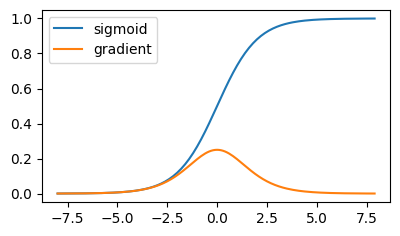

In [2]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
plt.figure(figsize=(4.5, 2.5))
plt.plot(x.numpy(), y.numpy(), x.numpy(), t.gradient(y, x).numpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

Exploding Gradients

In [3]:
M = tf.random.normal((4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = tf.matmul(M, tf.random.normal((4, 4)))
print('after multiplying 100 matrices\n', M.numpy())

a single matrix 
 tf.Tensor(
[[-1.4052644   0.58858913 -0.8873988  -0.58722204]
 [ 0.68667024 -0.15781972 -0.8739077  -0.8621797 ]
 [-0.16123301 -0.15214998 -0.21706027 -0.9769941 ]
 [ 1.6683037  -0.70147336  0.00547601 -0.9525616 ]], shape=(4, 4), dtype=float32)
after multiplying 100 matrices
 [[-3.2477900e+23 -1.6866663e+23  6.2130255e+22 -2.6677951e+23]
 [-4.2311747e+24 -2.1973662e+24  8.0942411e+23 -3.4755663e+24]
 [-2.8729227e+24 -1.4919876e+24  5.4959048e+23 -2.3598724e+24]
 [-5.0959914e+24 -2.6464889e+24  9.7486315e+23 -4.1859424e+24]]
